In [ ]:
# install relevant packages

!pip install sckan-compare==0.0.6
!pip install dash
!pip install dash-cytoscape

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 kB 388.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.6
    Uninstalling Werkzeug-2.3.6:
      Successfully uninstalled Werkzeug-2.3.6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 24.4 MB/s eta 0:00:00


## Ploting neuronal connectivity on basic anatomy map

In [ ]:
#import the base class to access all features
from sckan_compare import SckanCompare

# access query sub-module; we can add all template queries in here and import as required
from sckan_compare import query

/usr/local/lib/python3.10/dist-packages/sckan_compare/__init__.py:290: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [ ]:
# species="Mus musculus"
species = "Rattus norvegicus"
# species="Homo sapiens"

# creating an instance of our class
sc = SckanCompare(species=species)

# to execute a SPARQL query
result = sc.execute_query(query.neuron_path_query)
result_df = sc.get_neuron_dataframe(result, species_name=species)

# just to show output obtained
print(len(result))
print(len(result_df))

84662
749


/usr/local/lib/python3.10/dist-packages/sckan_compare/__init__.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, "Region_A"] = filtered_df.A.map(replacement_dict)
/usr/local/lib/python3.10/dist-packages/sckan_compare/__init__.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, "Region_B"] = filtered_df.B.map(replacement_dict)
/usr/local/lib/python3.10/dist-packages/sckan_compare/__init__.py:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [ ]:
# visualize a specific connection

# sc.add_connection(species="species", region_A="postganglionic sympathetic fiber", region_B="corpus cavernosum penis", region_C="urethral sphincter", neuron="set_neuron_name")
sc.reset_vis()
for i in range(len(result_df)):
    sc.add_connection(region_A=result_df.iloc[i,3],
                      region_B=result_df.iloc[i,5],
                      region_C=result_df.iloc[i,7],
                      neuron=result_df.iloc[i,1])

fig = sc.get_graph()
fig
# fig.show("colab")
# to clear graph
# sc.reset_vis()

## Plot the neuronal connectivity as a simple map

In [ ]:
# species="Mus musculus"
species = "Rattus norvegicus"
# species="Homo sapiens"

# creating an instance of our class
sc = SckanCompare(species=species)

# to execute a SPARQL query
result = sc.execute_query(query.neuron_path_query)
result_df = sc.get_neuron_dataframe(result, species_name=species)

# just to show output obtained
print(len(result))
print(len(result_df))

84662
749


/usr/local/lib/python3.10/dist-packages/sckan_compare/__init__.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/sckan_compare/__init__.py:206: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/sckan_compare/__init__.py:207: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda


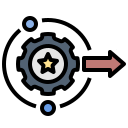
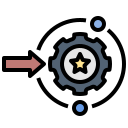
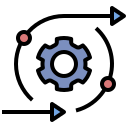
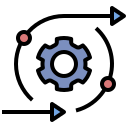
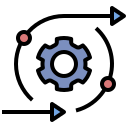
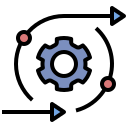

In [ ]:
from sckan_compare.simplevis import SimpleVisualizer

selected_Region_A = "first sacral dorsal root ganglion"
selected_Region_B = "Arteriole in connective tissue of bladder dome"
simvis = SimpleVisualizer()
fig = simvis.plot_figure(result_df, selected_Region_A, selected_Region_B)
fig
# fig.show("colab")